In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib as plt

In [105]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5220-A98C

 Directory of C:\Users\abc\OneDrive\Desktop\excelr\Assignments\Simple_Linear_Regression

24/08/2022  15:52    <DIR>          .
24/08/2022  15:52    <DIR>          ..
24/08/2022  07:48    <DIR>          .ipynb_checkpoints
24/08/2022  08:05            82,571 Assignment_4_Q2_Simple_Linear_Regrression_NihalInamdar.ipynb
24/08/2022  15:52            90,516 Assignment_4_Simple_Linear_Regrression_NihalInamdar.ipynb
23/08/2022  08:18               218 delivery_time.csv
23/08/2022  08:18               318 Problem_statements.txt
23/08/2022  08:18               454 Salary_Data.csv
               5 File(s)        174,077 bytes
               3 Dir(s)  20,807,155,712 bytes free


In [106]:
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

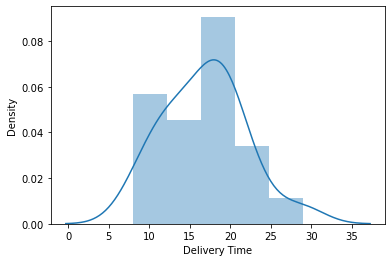

In [108]:
sns.distplot(df["Delivery Time"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

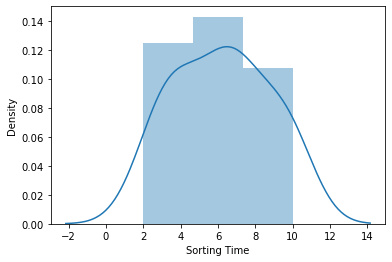

In [109]:
sns.distplot(df["Sorting Time"])

# Feature engineering

In [110]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

In [111]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

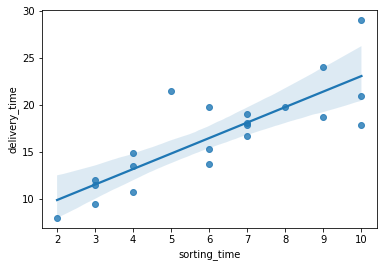

In [112]:
sns.regplot(x=df["sorting_time"],y=df["delivery_time"])

# Model Building

In [113]:
model=smf.ols("delivery_time~sorting_time",data=df).fit() #og least square ols

# Model Testing

In [114]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [115]:
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [116]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [93]:
delivery_time=(1.649020*(6))+6.582734 #Manual Prediction for data point 6 6.582734
delivery_time

16.476854

In [87]:
new_data=pd.Series([5,6]) #Automatic Prediction for data point 5 and 6
new_data

0    5
1    6
dtype: int64

In [100]:
data_pred=pd.DataFrame(new_data, columns=["sorting_time"])
data_pred

,sorting_time
0,5
1,6


In [101]:
model.predict(data_pred)

0    14.827833
1    16.476853
dtype: float64

In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        16:04:26   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Improvement

In [119]:
model2=smf.ols("np.log(delivery_time)~sorting_time",data=df).fit()

In [120]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Wed, 24 Aug 2022   Prob (F-statistic):           1.59e-06
Time:                           16:05:52   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
# squarring, exponentially indexing and log of any ind or dep variable makes the model better 